## ASTR 2100, Winter 2020

## Lab 3 

###  Monday, February 10

The exercises in this lab will constitute the first exercise of HW 3, which will be distributed on Monday, evening. 

#### Jupyter notebooks with class notes and assignments: https://github.com/a-kravtsov/a211w20

#### Slack workspace for this class: https://a211w20.slack.com


import packages needed by the codes below. Run this cell first before using these codes. 

In [1]:
import numpy as np

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plot_utils import plot_pretty
plot_pretty(fontsize=12)

### Exercise 1: 1D and 2D histograms of data. (15 points)

**Background.** I introduced the issue of choosing histogram bin width in class and you can find heuristic criteria and objective methods (Shimazaki-Shinomoto method and Knuth method) of estimating the bin width (or, equivalently, the number of bins for a given range of data) in the notebook <a href="04_histograms.ipynb"><tt>04_histograms.ipynb</tt></a>. 

In that notebook I used the heavy element abundances of globular clusters in our Milky Way galaxy to illustrate that the structure in that distribution (in particular two peaks, or, "modes" in the distribution) is likely not real, because when histogram is constructed with the 6-8 bins suggested objective methods, no two peaks are apparent. 

In this exercise, you will explore how these criteria and methods work in another specific application: distribution of colors of galaxies. For this, you will first get your sample of galaxies from the Sloan Digital Sky Survey (SDSS) data bases, as described in the companion <a href="hw03_background_sdss.ipynb"><tt>hw03_background_sdss.ipynb</tt></a> notebook. 

### What you are learning in this exercise

* To use basic SQL commands to query an astronomical data base.
* Some basic facts about "colors" of galaxies in nearby Universe. 
* How to use objective criteria to estimate bin width and the number of bins to be used in a histogram. 
* How to evaluate whether certain features in the distribution of some quantity are real or not. 

**Task 1a. (5 points)** Acquire SDSS galaxy sample, as described in <a href="hw03_background_sdss.ipynb"><tt>hw03_background_sdss.ipynb</tt></a> notebook. Run the cells below and construct the histogram using the plotting routine, as shown. 

Note that you can pass the number of bins as an integer to the routine via <tt>bins</tt> parameter. Plot histogram of $g-r$ colors of galaxies for different number of bins and note and briefly describe any changes in the appearance of the histogram. (2 points)

You can also pass string options that are accepted by the <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html"><tt>numpy.histogram</tt></a> routine: <tt>'auto', 'sturges', 'fd', 'scott', 'rice', 'sqrt'.</tt> The meaning of these options and the heuristic models for bin number or bin width these correspond to is explained in the <a href="04_histograms.ipynb"><tt>04_histograms.ipynb</tt></a> notebook. Explore how the histogram changes when each of these options is used and briefly describe your results. (3 points)

In [2]:
from astropy.io import fits

hdulist = fits.open('data/sdss_galaxies.fits') 

# data table in the FITS is a dictionary, which we will convert to the numpy dictionary (record)
data = np.asarray(hdulist[1].data)

In [3]:
# this will give us names of columns and their data types
print(data.dtype)

(numpy.record, [('objid', '>i8'), ('ra', '>f8'), ('dec', '>f8'), ('g', '>f4'), ('r', '>f4'), ('z', '>f4')])


Data in dictionaries can be accessed by the name of the corresponding variable. For example, we can subselect indices of data that satisfied a set of constraints as follows

In [4]:
zmin, zmax = 0.01, 0.14
rmin, rmax = 12, 17.77
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))

In astronomy, the different of apparent magnitudes of an object measured in different filters is called "color," in analogy with how our eye converts brightness of light in different parts of the visible spectrum into perceived color. Here we will define $g-r$ color as the different of apparent magnitudes of galaxies in our sample in the $g$ and $r$ filters. 

In [5]:
# g-r color of all galaxies in the selected subsample
mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]

In [6]:
print(np.size(gr))
print(gr.min(), gr.max())

71907
-10016.697 10.067097


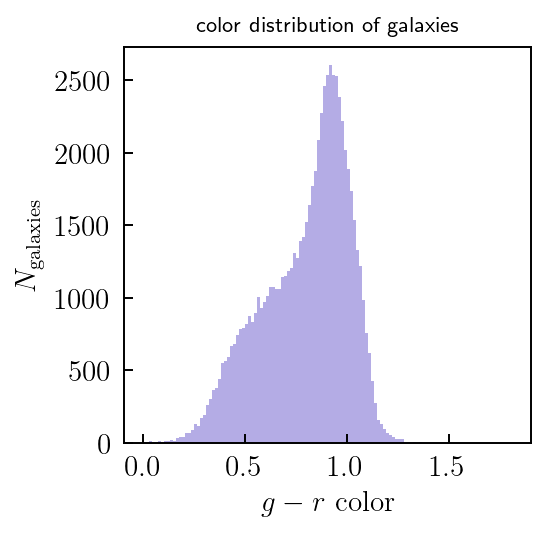

In [7]:
from codes.plot_utils import plot_histogram 
plot_pretty(fontsize=12)

gr_sub = gr[(gr < 2) & (gr > 0)]
plot_histogram(gr_sub, bins='fd', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

**Task 1b.** (5 points) Change the sample selection below by making redshift range (<tt>zmin, zmax</tt>) and/or range of $r$-band magnitude (<tt>rmin, rmax</tt>) narrower and centered on different values. Using <tt>bins='scott'</tt> for the binning, find a combination of ranges for which the distribution starts to look significantly different from that in 1a. 

In particular, for some choices it may reveal a new type of structure in the distribution with two distinct peaks. To identify where this happens, it may help to examine the distribution of colors in the $m_r-(g-r)$ plane. To do this, the code below uses routine, which in turn uses <a href="">numpy.histogram2d</a> and the Matplotlib's <tt>colormesh</tt> routine we used before to plot $d_L$ in the $\Omega_{\rm m0}-\Omega_\Lambda$ plot.  Look for ranges of $m_r$ in the distribution where more interesting structure is present. 

Briefly describe your exploration and results and show the final plot for which the distribution differs significantly and selection criteria that were used to subselect galaxies in that case. 


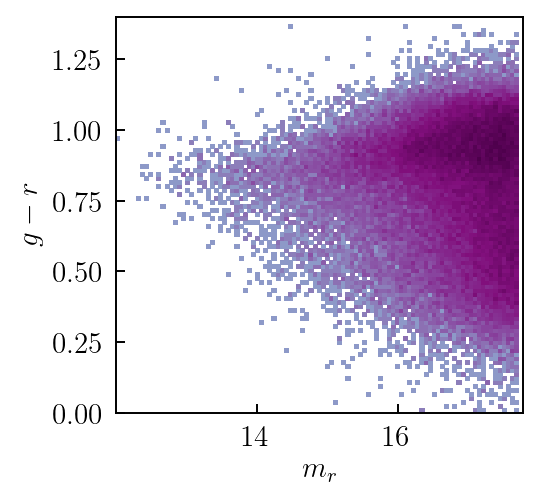

In [8]:
from codes.plot_utils import plot_2d_dist

plot_2d_dist(mr, gr, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=100, nybins=100, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

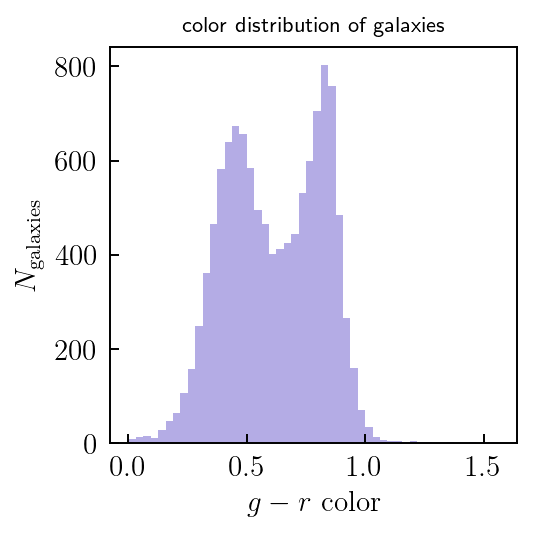

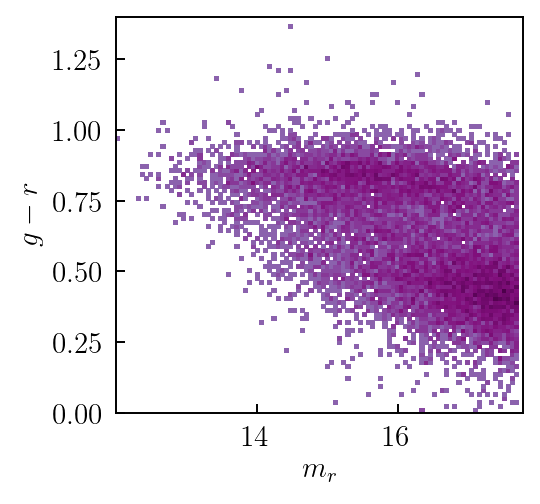

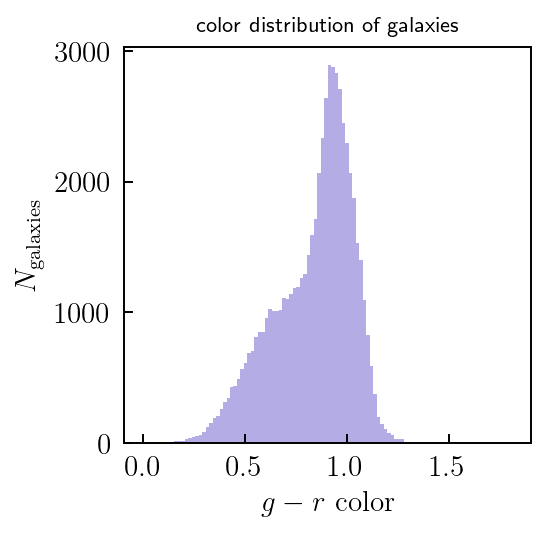

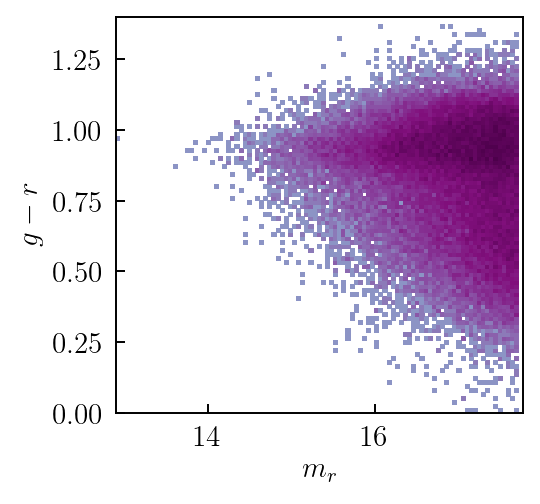

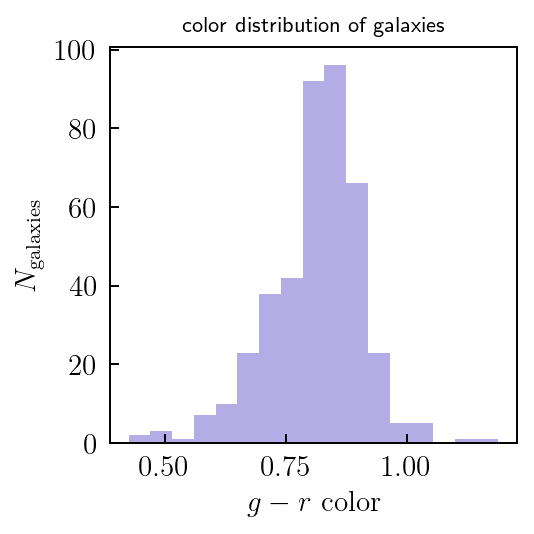

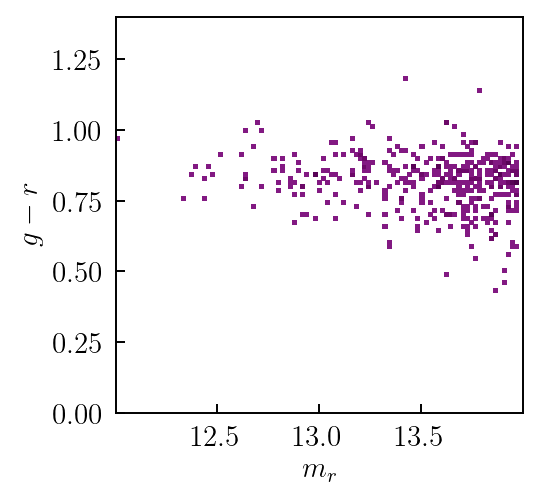

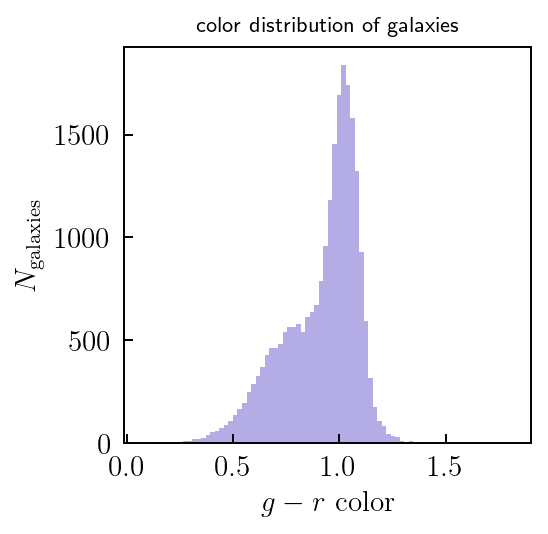

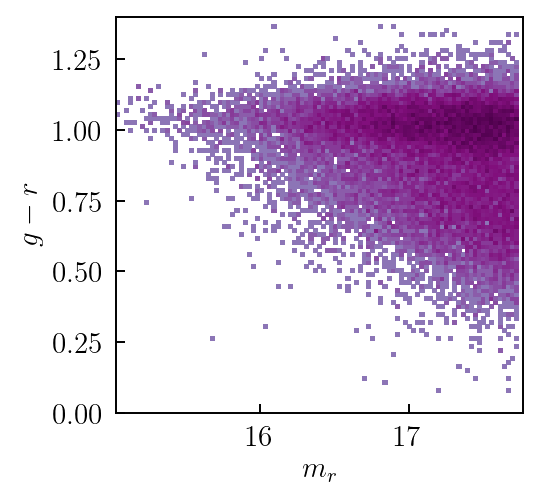

In [26]:
zmin, zmax = 0.01, 0.05
rmin, rmax = 12, 17.77
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))
mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]
plot_histogram(gr[(gr < 2) & (gr > 0)], bins='scott', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)
plot_2d_dist(mr, gr, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=100, nybins=100, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

zmin, zmax = 0.05, 0.14
rmin, rmax = 12, 17.77
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))
mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]
plot_histogram(gr[(gr < 2) & (gr > 0)], bins='scott', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)
plot_2d_dist(mr, gr, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=100, nybins=100, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

zmin, zmax = 0.01, 0.05
rmin, rmax = 12, 14
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))
mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]
plot_histogram(gr[(gr < 2) & (gr > 0)], bins='scott', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)
plot_2d_dist(mr, gr, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=100, nybins=100, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

zmin, zmax = 0.10, 0.14
rmin, rmax = 15, 17.77
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))
mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]
plot_histogram(gr[(gr < 2) & (gr > 0)], bins='scott', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)
plot_2d_dist(mr, gr, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=100, nybins=100, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

**Task 1c** (5 points). Given the lesson from binning metallicities of globular clusters in <a href="04_histograms.ipynb"><tt>04_histograms.ipynb</tt></a>, which showed that structure in the distribution may not real, check whether it is still present if the number of bins is estimated using the The Shimazaki-Shinomoto method and Knuth method. Examples of their use can be found in the <a href="04_histograms.ipynb"></a> and their usage for this case is shown in the cells below. Report your results and briefly describe your conclusions. 

In [19]:
zmin, zmax = 0.01, 0.14
rmin, rmax = 12, 17.77
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))

# g-r color of all galaxies in the selected subsample
mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]
mr_sub = mr[(gr < 2) & (gr > 0)]
gr_sub = gr[(gr < 2) & (gr > 0)]

In [11]:
from codes.histtools import shimazaki_shinomoto_rule

nss, hss = shimazaki_shinomoto_rule(gr_sub, Nbmin=4, Nbmax=500)

print("number of bins according to Shimazaki-Shinomoto method is %d"%nss)

number of bins according to Shimazaki-Shinomoto method is 146


In [14]:
from codes.histtools import knuth_bin_width

h_knuth, bins_knuth = knuth_bin_width(gr_sub, return_bins=True)

n_knuth = np.shape(bins_knuth)[0] - 1
print("number of bins according to Knuth method is %d"%n_knuth)

Optimization terminated successfully.
         Current function value: -58270.169935
         Iterations: 22
         Function evaluations: 57
number of bins according to Knuth method is 71


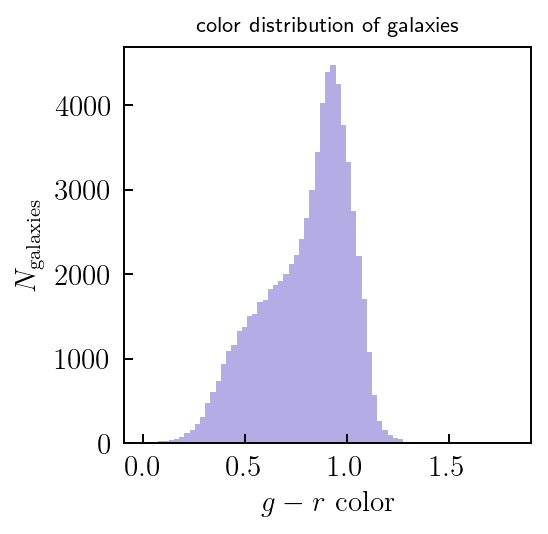

In [15]:
from codes.plot_utils import plot_histogram 
plot_pretty(fontsize=12)

plot_histogram(gr_sub, bins=n_knuth, xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

**Task 1d.** (10 points). Based on what you learned from material in <a href="04_histograms.ipynb"><tt>04_histograms.ipynb</tt></a> and in the exercises above, think about, develop, and describe a rough heuristic argument to guide the choice of number of bins in each dimension for a 2-dimensional histogram (5 points). Apply the rule you developed to the histogram of galaxies in the $m_r-(g-r)$ plane suggested in the Task 1b above and show the corresponding plot (2 points). 

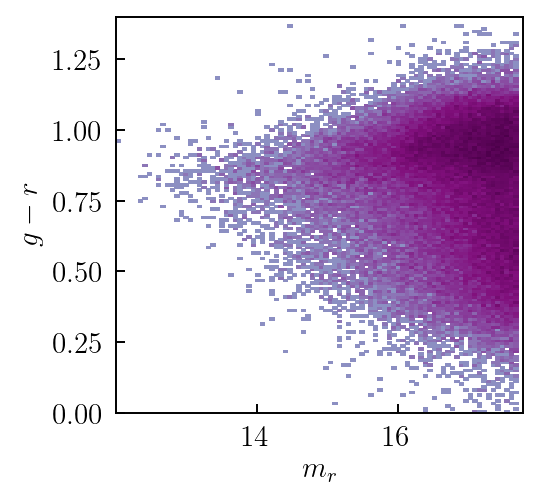

Optimization terminated successfully.
         Current function value: -61196.782051
         Iterations: 23
         Function evaluations: 61
number of mr bins according to Knuth method is 37
Optimization terminated successfully.
         Current function value: -58270.169935
         Iterations: 22
         Function evaluations: 57
number of [g-r]bins according to Knuth method is 71


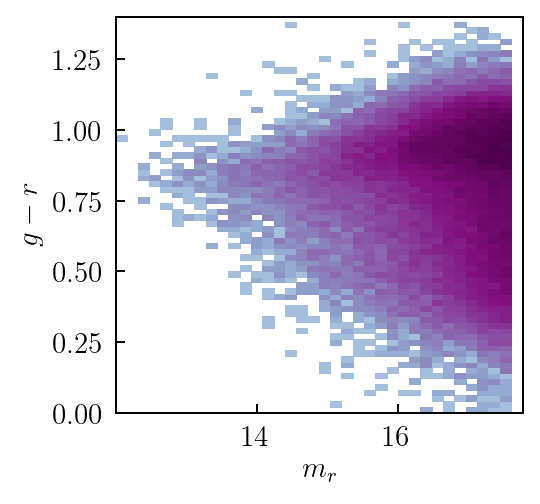

In [20]:
#2D histogram using Shimazaki-Shinomoto rule
mr_ss, mr_hss = shimazaki_shinomoto_rule(mr, Nbmin=4, Nbmax=500)
gr_ss, gr_hss = shimazaki_shinomoto_rule(gr_sub, Nbmin=4, Nbmax=500)
plot_2d_dist(mr_sub, gr_sub, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=mr_ss, nybins=gr_ss, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

#2D histogram using Knuth method
#Choose number of bins for mr
mr_h_knuth, mr_bins_knuth = knuth_bin_width(mr, return_bins=True)
mr_knuth = np.shape(mr_bins_knuth)[0] - 1
print("number of mr bins according to Knuth method is %d"%mr_knuth)
#Choose number of bins for gr
gr_h_knuth, gr_bins_knuth = knuth_bin_width(gr_sub, return_bins=True)
gr_knuth = np.shape(gr_bins_knuth)[0] - 1
print("number of [g-r]bins according to Knuth method is %d"%gr_knuth)
#Show 2-dimensional histogram
plot_2d_dist(mr, gr, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=mr_knuth, nybins=gr_knuth, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

Finally, using the galaxy coordinates <tt>xgal</tt> and <tt>ygal</tt> computed as shown below, plot distribution of galaxies as 2d histogram using routine <tt>plot_2d_dist</tt>, instead of plotting each galaxy as a point, as in the code below. Discuss whether the rule you developed for the number of bins for choosing the number of bins produce reasonable results in this case as well? (3 points). 

Optimization terminated successfully.
         Current function value: -23832.951583
         Iterations: 17
         Function evaluations: 48
number of bins for y-coordinates according to Knuth method is 79
Optimization terminated successfully.
         Current function value: -28573.279613
         Iterations: 18
         Function evaluations: 50
number of bins for x-coordinates according to Knuth method is 95


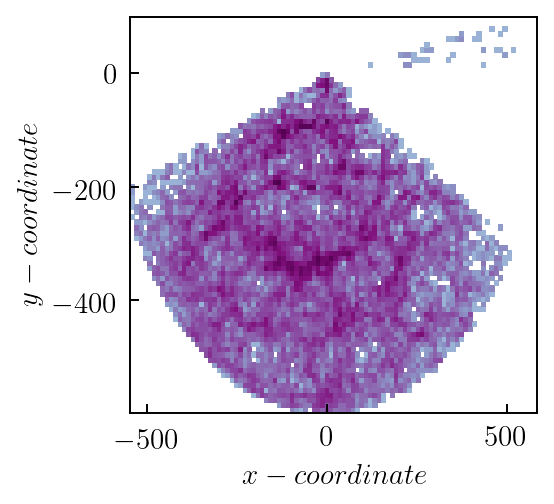

In [17]:
from codes.constants import clight 

H0 = 70. 
d_C = clight * data['z'] / H0 # approximate calculation of comoving distance using Hubble law

# conversion of sky coordinates in x-y coordinates. all galaxies are assumed to have the same dec
# for visualization purposes
ygal = d_C * np.cos(data['ra'] * np.pi / 180.)
xgal = d_C * np.sin(data['ra'] * np.pi / 180.)

#Choose number of bins for y-coordinate of galaxies
yg_h_knuth, yg_bins_knuth = knuth_bin_width(ygal, return_bins=True)
yg_knuth = np.shape(yg_bins_knuth)[0] - 1
print("number of bins for y-coordinates according to Knuth method is %d"%yg_knuth)
#Choose number of bins for x-coordinate of galaxies
xg_h_knuth, xg_bins_knuth = knuth_bin_width(xgal, return_bins=True)
xg_knuth = np.shape(xg_bins_knuth)[0] - 1
print("number of bins for x-coordinates according to Knuth method is %d"%xg_knuth)
#Show 2-dimensional histogram
plot_2d_dist(xgal, ygal, xlim=[xgal.min(), xgal.max()], ylim=[ygal.min(), ygal.max()],
             nxbins=xg_knuth, nybins=yg_knuth, 
             xlabel=r'$x-coordinate$', ylabel=r'$y-coordinate$', figsize=(3,3))

In [33]:
from codes.constants import clight 

H0 = 70. 
d_C = clight * data['z'] / H0 # approximate calculation of comoving distance using Hubble law

# conversion of sky coordinates in x-y coordinates. all galaxies are assumed to have the same dec
# for visualization purposes
ygal = d_C * np.cos(data['ra'] * np.pi / 180.)
xgal = d_C * np.sin(data['ra'] * np.pi / 180.)


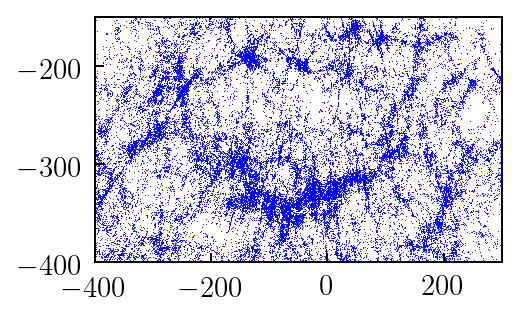

In [41]:
figx = 3.
xmin, xmax = -400.,  300.
ymin, ymax = -400., -150.


fxy = np.abs(ygal.max()-ygal.min()) / np.abs(xgal.max() - xgal.min())
figy = figx  * fxy

plot_pretty(fontsize=12)
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(figx,figy))
plt.xlim([xmin, xmax]); plt.ylim([ymin, ymax])

ax.scatter(xgal, ygal, s=0.2, lw=0, c='b')

plt.show()

### Exercise 2: using $\tilde{d}_L$ approximation and supernova type Ia sample to constrain $\Omega_{\rm m0}$ and $\Omega_\Lambda$

The full exercise will be distributed later. In the lab, you can get acquainted with the concept of pickled Python objects for transferring results of the approximation you obtained for $\tilde{d}_L$ for use in this exercse. 

A tutorial on using this method can be found <a href="https://thepythonguru.com/pickling-objects-in-python/">here</a>.

The use of the method is illustrated below and as you will see is quite simple. 

Suppose I produced a spline object (class) <tt>spl2d_c</tt> or computed polynomial coefficients in the numpy vector <tt>ac</tt> in exercise 2 of hw 2. 

By spline object we mean here the instantiated spline class that you can now use for test points as, for example: 
<tt>spl2d_c(Om0t, OmLt)</tt> (your names for these can of course be different). 

We can save (or dump in pickle package terminology) these into binary file, as follows.

In [1]:
import pickle 

f = open("data/d_L_polycoeffs", "wb")
pickle.dump(ac, f) # dump polynomial coefficients into the file
f.close()

f = open("data/d_L_spline", "wb")
pickle.dump(spl2d_c, f) # dump 2d spline object into the file
f.close()


NameError: name 'ac' is not defined

We can then read them in a separate python code or notebook as follows. 

In [101]:
import pickle 

f = open("data/d_L_spline", "rb")
d_l_spl = pickle.load(f)
f.close()

f = open("data/d_L_polycoeffs", "rb")
ac = pickle.load(f)
f.close()

Once these are read, we can then use the spline or polynomial coefficients I recovered from the pickle file just as we would use them in they were produced in the same code or notebook, as shown below. 

Note that I use polynomial of order <tt>px, py = 13, 13</tt> because this is what I concluded produced optimal results in my exercise. Your results may be different. You also should use the best method you chose - there is no need to use both spline *and* polynomial approximation here, only one of them. 

In [36]:
Om0min, Om0max, nOm0 = 0, 1, 100
OmLmin, OmLmax, nOmL = 0, 1, 100

Om0 = np.linspace(Om0min, Om0max, nOm0)
OmL = np.linspace(OmLmin, OmLmax, nOmL)

# generate a 2d grid of x and y points
Om0g, OmLg = np.meshgrid(Om0, OmL, sparse=False, indexing='ij')

dLg = d_l_spl(Om0, OmL)

px, py = 13, 13
dLpg = np.polynomial.polynomial.polyval2d(Om0g, OmLg, ac.reshape((px+1,py+1)))


NameError: name 'd_l_spl' is not defined

Two warnings about using pickle: 

* When using binary format for pickle, the resulting pickled object may not be transferrable to another computer, which has different operating system and Python version. So it's best used for internal needs on your machine. 


* Reading pickled objects produced by someone else is dangerous, because it can execute malicious code upon reading. Thus, use only pickle files produced by you or by someone you trust. 